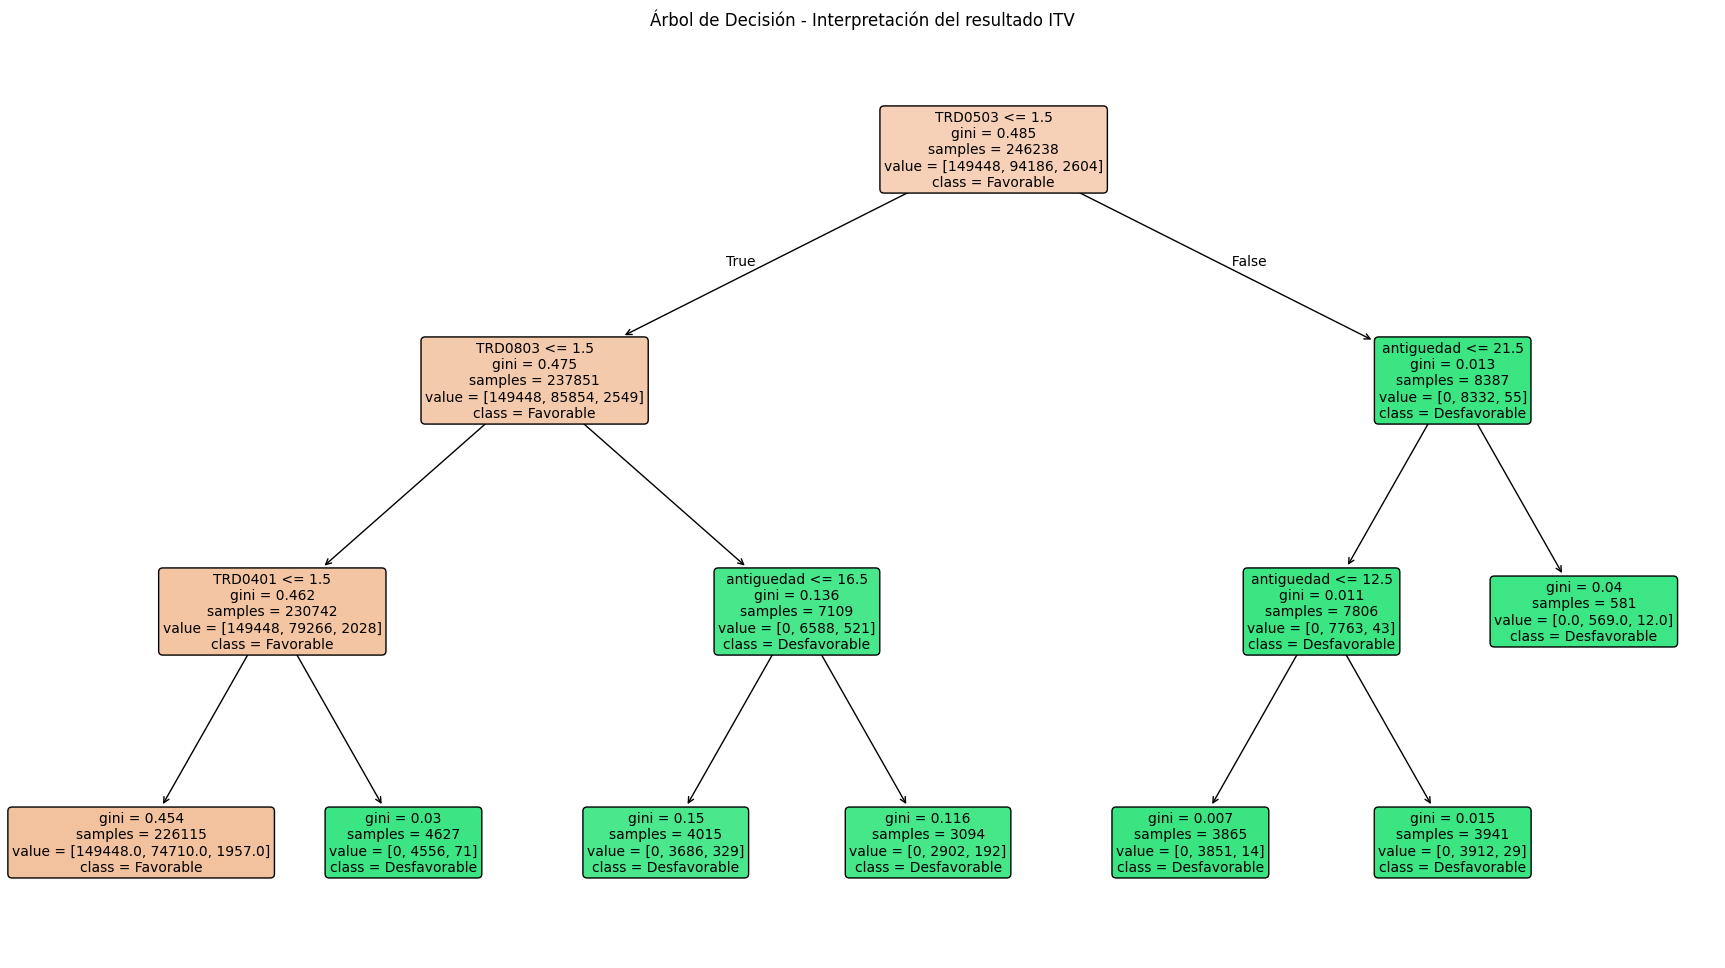

Accuracy del árbol de decisión: 0.6849740090968162

 Informe de clasificación:
              precision    recall  f1-score   support

   Favorable       0.66      1.00      0.80     37362
Desfavorable       0.97      0.20      0.34     23547
    Negativa       0.00      0.00      0.00       651

    accuracy                           0.68     61560
   macro avg       0.54      0.40      0.38     61560
weighted avg       0.77      0.68      0.61     61560



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


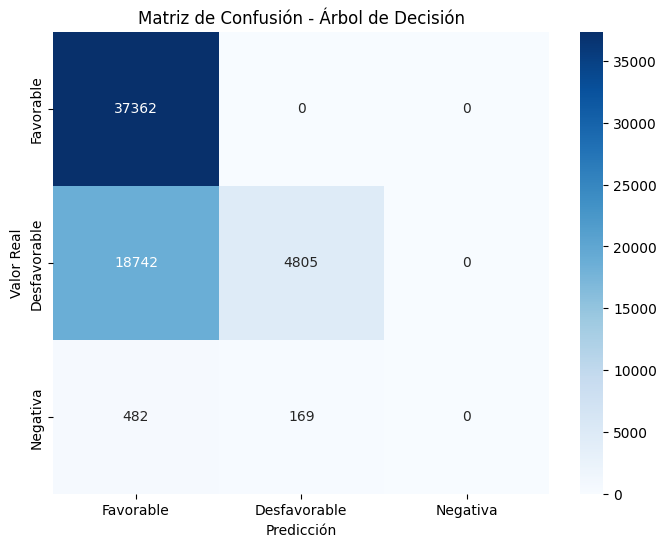

In [2]:
# BLOQUE 1 – Árbol de Decisión Exploratorio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Separar la variable objetivo (target) y las predictoras
X = df.drop(columns=['target'])
y = df['target']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Crear y entrenar árbol de decisión simplificado
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=500,
    min_samples_leaf=250,
    random_state=42
)
tree.fit(X_train, y_train)

# Visualizar el árbol
labels = ['Favorable', 'Desfavorable', 'Negativa']

plt.figure(figsize=(22, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=labels,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Interpretación del resultado ITV")
plt.show()

y_pred = tree.predict(X_test)

print("Accuracy del árbol de decisión:", accuracy_score(y_test, y_pred))
print("\n Informe de clasificación:")
print(classification_report(y_test, y_pred, target_names=labels))

# 7. Matriz de confusión con etiquetas de clase
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

🔍 Accuracy del modelo Random Forest: 0.8350227420402859

🔍 Informe de clasificación:
              precision    recall  f1-score   support

   Favorable       0.80      0.98      0.88     37362
Desfavorable       0.93      0.62      0.75     23547
    Negativa       0.18      0.03      0.05       651

    accuracy                           0.84     61560
   macro avg       0.64      0.54      0.56     61560
weighted avg       0.85      0.84      0.82     61560



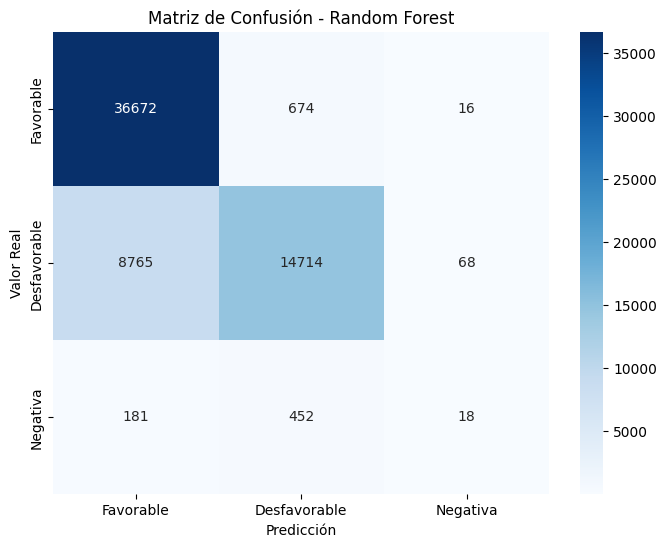

<ipython-input-8-112181489>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis')


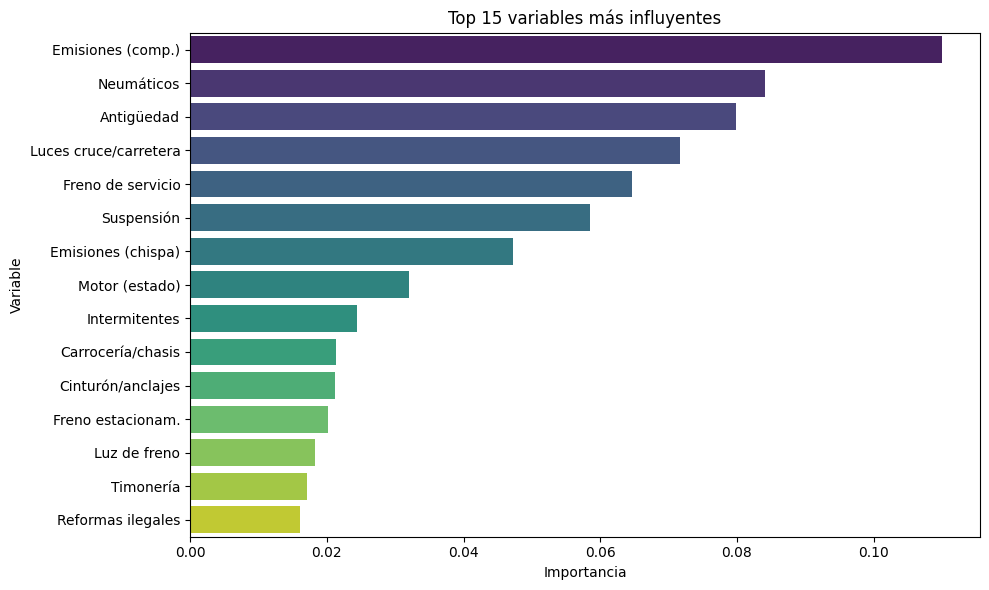

In [8]:
# BLOQUE 2 – Modelo Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Renombrar la columna antiguedad si existe
if 'antiguedad' in df.columns:
    df = df.rename(columns={'antiguedad': 'antigüedad'})

# Dividir variables predictoras y la variable objetivo
X = df.drop(columns=['target'])
y = df['target']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar rendimiento
y_pred = rf_model.predict(X_test)

print(" Accuracy del modelo Random Forest:", accuracy_score(y_test, y_pred))


target_names = ['Favorable', 'Desfavorable', 'Negativa']

print("\n Informe de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


nombre_variables = {
    'antigüedad': 'Antigüedad',
    'TRD0101': 'Doc. incompleta', 'TRD0102': 'Nº bastidor', 'TRD0103': 'Placas matrícula',
    'TRD0201': 'Antie. delantero', 'TRD0202': 'Carrocería/chasis', 'TRD0203': 'Acoplamiento',
    'TRD0204': 'Guardabarros', 'TRD0205': 'Limpia/lava', 'TRD0206': 'Protección lateral',
    'TRD0207': 'Protección trasera', 'TRD0208': 'Puertas/peldaños', 'TRD0209': 'Retrovisores',
    'TRD0210': 'Señales vehículo', 'TRD0211': 'Soporte rueda ext.', 'TRD0212': 'Vidrios seguridad',
    'TRD0213': 'Elem. M2/M3 (ext.)', 'TRD0301': 'Asientos/anclajes', 'TRD0302': 'Cinturón/anclajes',
    'TRF0303': 'Silla infantil', 'TRD0304': 'Antihielo/vaho', 'TRD0305': 'Antirrobo/alarma',
    'TRD0306': 'Visibilidad', 'TRD0307': 'Ret. de carga', 'TRD0308': 'Velocímetro',
    'TRD0309': 'Salientes interiores', 'TRD0310': 'Elem. M2/M3 (int.)',
    'TRD0401': 'Luces cruce/carretera', 'TRD0402': 'Luz marcha atrás', 'TRD0403': 'Intermitentes',
    'TRD0404': 'Luz emergencia', 'TRD0405': 'Luz de freno', 'TRD0406': 'Luz matrícula',
    'TRD0407': 'Luces posición', 'TRD0408': 'Antiniebla', 'TRD0409': 'Luz gálibo',
    'TRD0410': 'Catadióptricos', 'TRD0411': 'Alumbrado interior', 'TRD0412': 'Claxon',
    'TRD0413': 'Luz estacionamiento', 'TRD0414': 'Señal puertas', 'TRD0415': 'Señal lum. específica',
    'TRD0416': 'Luz diurna', 'TRD0501': 'Ruido', 'TRD0502': 'Emisiones (chispa)',
    'TRD0503': 'Emisiones (comp.)', 'TRD0601': 'Freno de servicio', 'TRD0602': 'Freno secundario',
    'TRD0603': 'Freno estacionam.', 'TRD0604': 'Freno inercia', 'TRD0605': 'ABS',
    'TRD0606': 'Desacelerador', 'TRD0607': 'Pedal freno', 'TRD0608': 'Bomba/depósito',
    'TRD0609': 'Presión baja', 'TRD0610': 'Válvula freno mano', 'TRD0611': 'Válvulas frenado',
    'TRD0612': 'Acumulador', 'TRD0613': 'Frenos remolque', 'TRD0614': 'Servofreno',
    'TRD0615': 'Tubos rígidos', 'TRD0616': 'Tubos flexibles', 'TRD0617': 'Forros freno',
    'TRD0618': 'Tambores/discos', 'TRD0619': 'Conexiones freno', 'TRD0620': 'Cilindros freno',
    'TRD0621': 'Válvula carga', 'TRD0622': 'Ajuste automático', 'TRD0701': 'Desv. ruedas',
    'TRD0702': 'Volante/columna', 'TRD0703': 'Caja dirección', 'TRD0704': 'Timonería',
    'TRD0705': 'Servodirección', 'TRD0801': 'Ejes', 'TRD0802': 'Ruedas',
    'TRD0803': 'Neumáticos', 'TRD0804': 'Suspensión', 'TRD0901': 'Motor (estado)',
    'TRD0902': 'Sistema alimentación', 'TRD0903': 'Escape', 'TRD0904': 'Transmisión',
    'TRD0905': 'Gas carburante', 'TRD1001': 'Mercancías peligrosas', 'TRD1002': 'Perecederos',
    'TRD1003': 'Escolares', 'TRD1004': 'Tacógrafo', 'TRD1005': 'Limitador vel.',
    'TRD1006': 'Reformas ilegales'
}

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_named = importances.rename(index=nombre_variables)
importances_sorted = importances_named.sort_values(ascending=False).head(15)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis')
plt.title("Top 15 variables más influyentes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


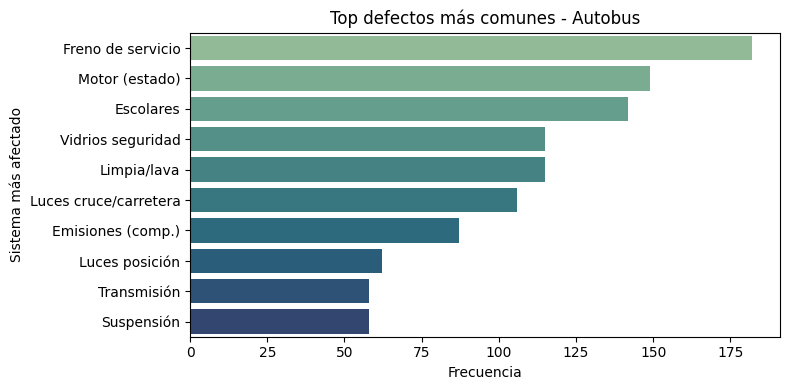

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


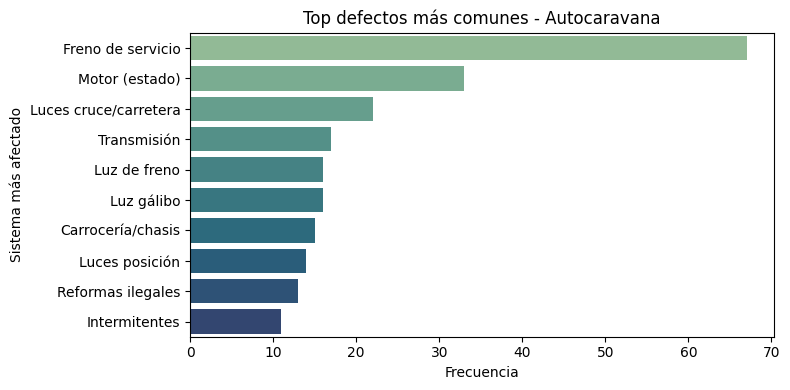

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


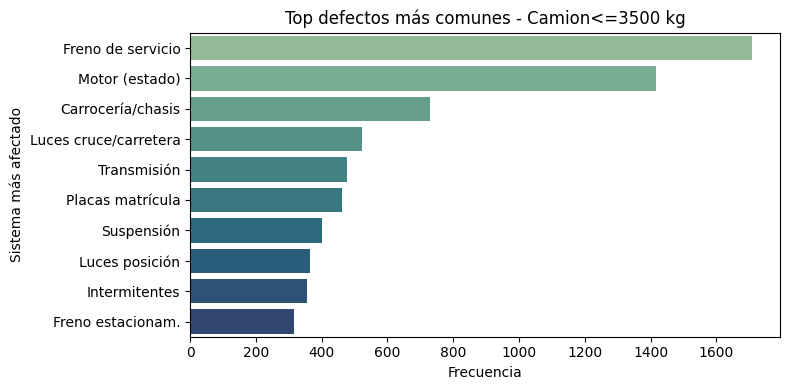

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


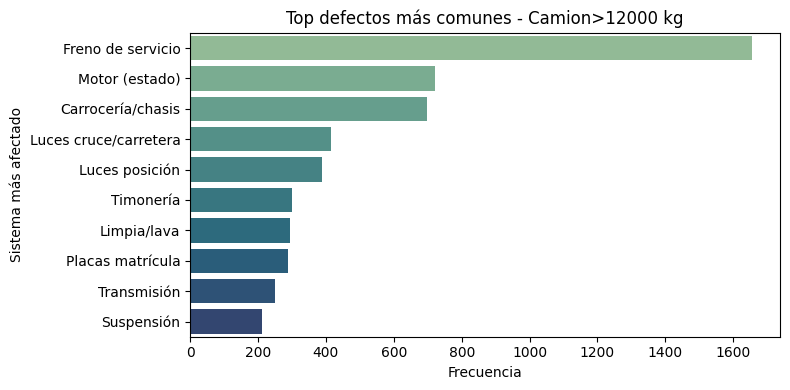

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


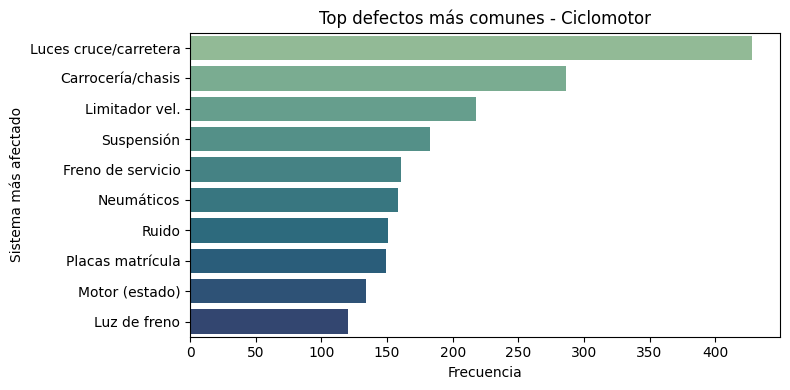

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


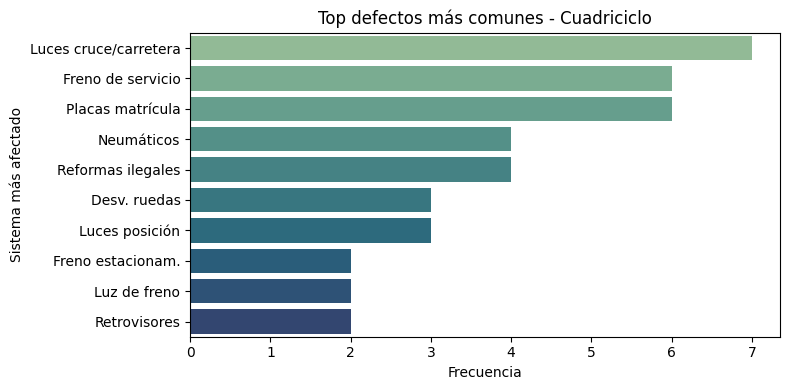

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


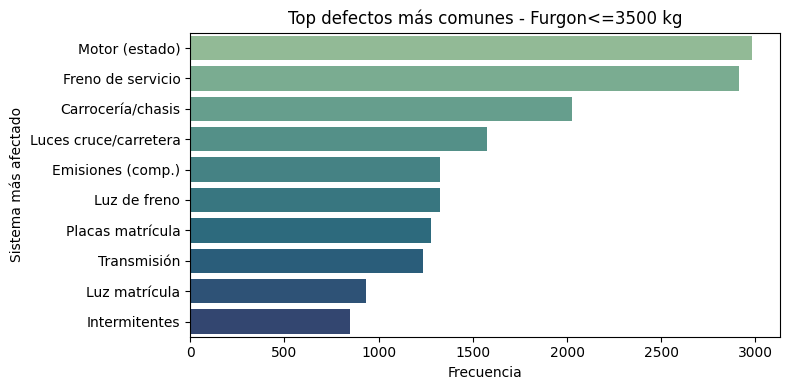

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


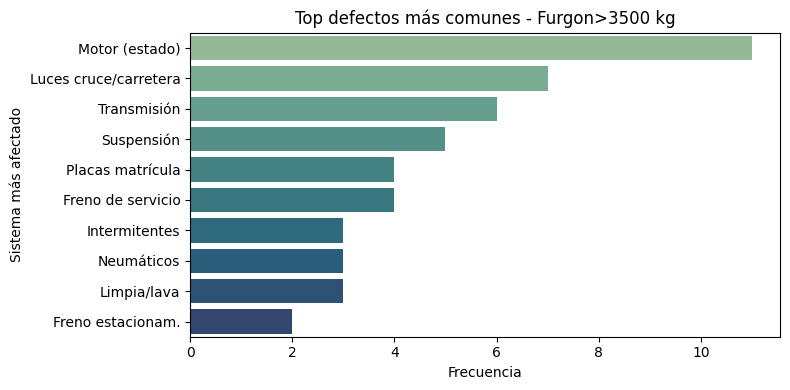

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


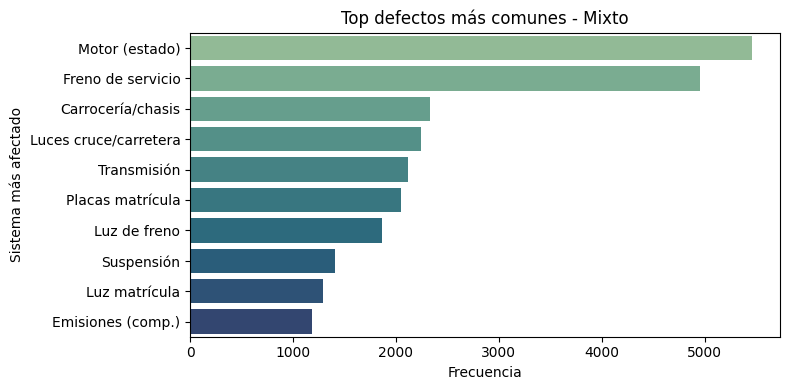

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


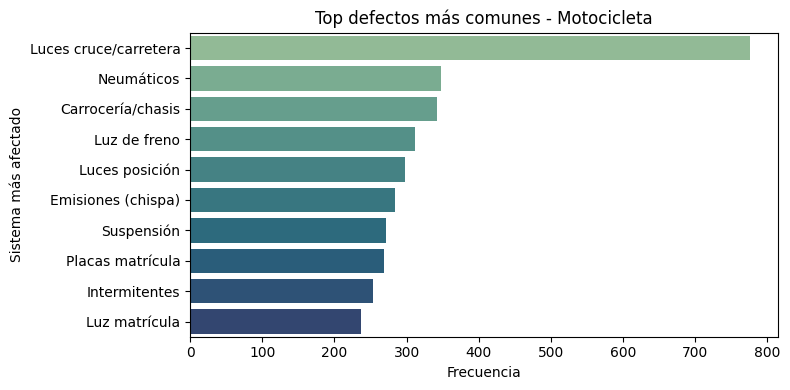

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


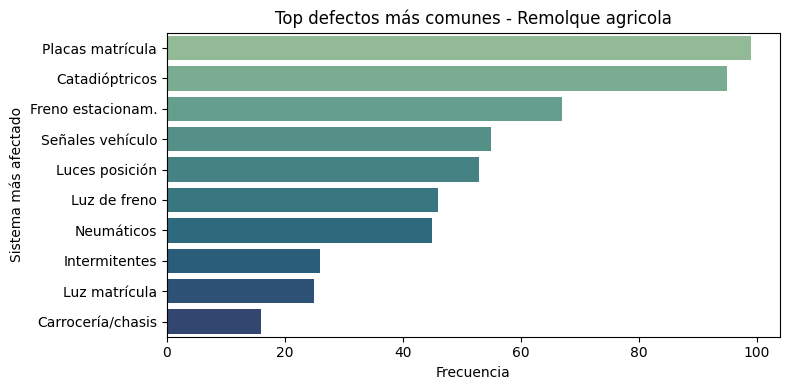

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


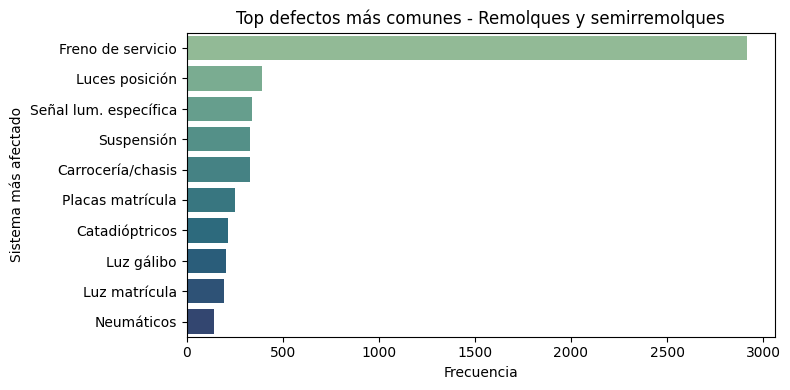

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


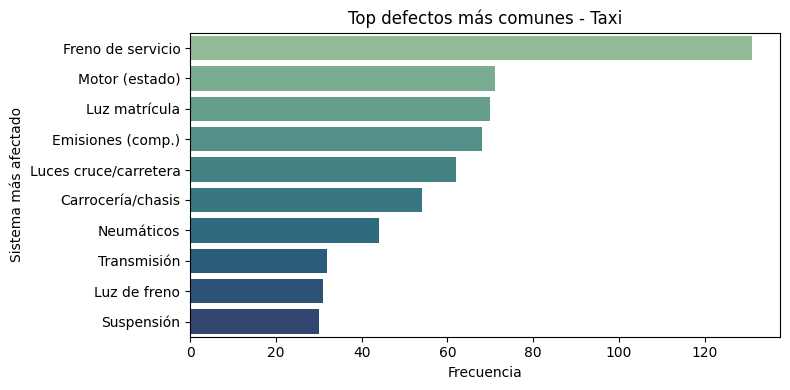

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


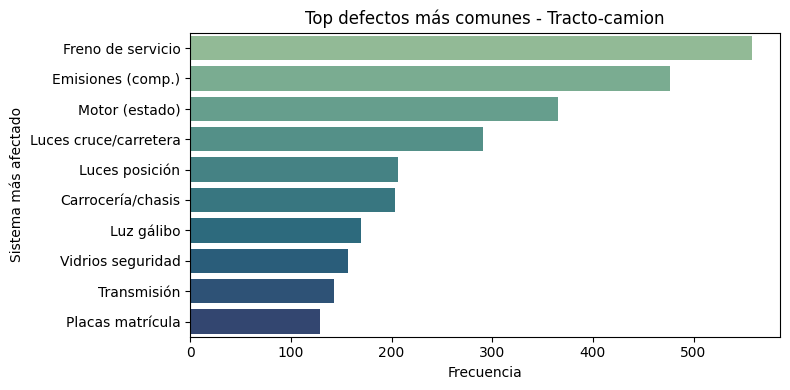

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


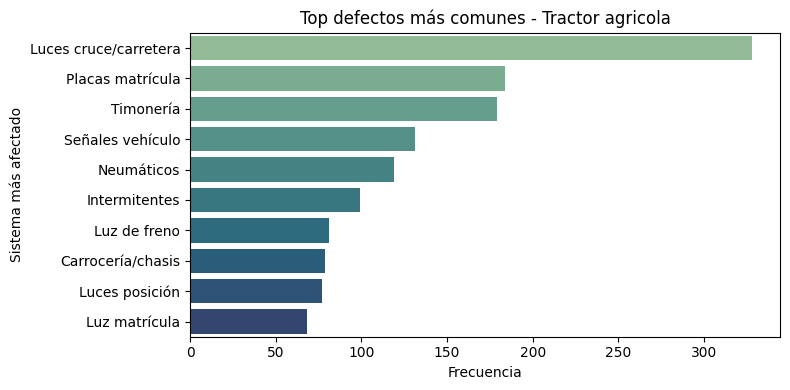

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


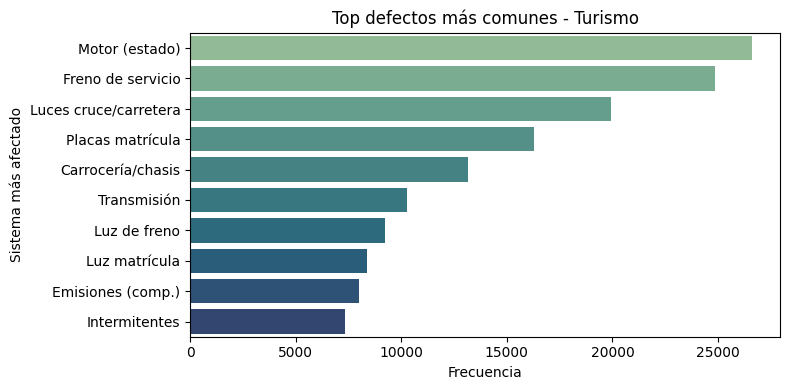

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


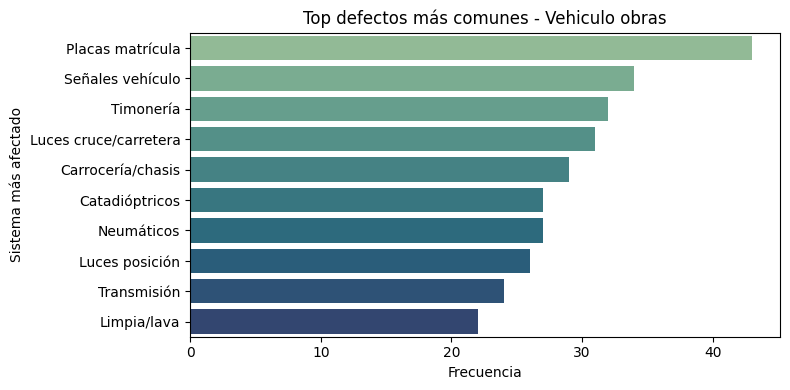

col_0,AUTOBUS,AUTOCARAVANA,CAMION<=3500 KG,CAMION>12000 KG,CICLOMOTOR,CUADRICICLO,FURGON<=3500 KG,FURGON>3500 KG,MIXTO,MOTOCICLETA,REMOLQUE AGRICOLA,REMOLQUES Y SEMIRREMOLQUES,TAXI,TRACTO-CAMION,TRACTOR AGRICOLA,TURISMO,VEHICULO OBRAS
sistema_fallo_principal,,,,,,,,,,,,,,,,,
ABS,21,0,10,24,0,0,33,0,30,6,0,60,0,17,0,412,0
Acoplamiento,11,2,24,9,0,0,35,0,68,0,1,10,1,7,1,192,0
Acumulador,0,0,0,13,0,0,0,0,0,0,0,7,0,2,0,0,0
Ajuste automático,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Alumbrado interior,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visibilidad,0,0,0,0,0,0,0,0,7,2,0,0,0,0,0,12,0
Volante/columna,5,0,20,14,52,1,54,0,74,62,0,0,0,2,5,217,1
Válvula carga,3,0,7,3,0,0,8,0,9,0,0,1,0,0,0,6,0


Chi-cuadrado: 148158.10, p-valor: 0.0000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

nombre_fallos = {
    'TRD0101': 'Doc. incompleta', 'TRD0102': 'Nº bastidor', 'TRD0103': 'Placas matrícula',
    'TRD0201': 'Antie. delantero', 'TRD0202': 'Carrocería/chasis', 'TRD0203': 'Acoplamiento',
    'TRD0204': 'Guardabarros', 'TRD0205': 'Limpia/lava', 'TRD0206': 'Protección lateral',
    'TRD0207': 'Protección trasera', 'TRD0208': 'Puertas/peldaños', 'TRD0209': 'Retrovisores',
    'TRD0210': 'Señales vehículo', 'TRD0211': 'Soporte rueda ext.', 'TRD0212': 'Vidrios seguridad',
    'TRD0213': 'Elem. M2/M3 (ext.)', 'TRD0301': 'Asientos/anclajes', 'TRD0302': 'Cinturón/anclajes',
    'TRF0303': 'Silla infantil', 'TRD0304': 'Antihielo/vaho', 'TRD0305': 'Antirrobo/alarma',
    'TRD0306': 'Visibilidad', 'TRD0307': 'Ret. de carga', 'TRD0308': 'Velocímetro',
    'TRD0309': 'Salientes interiores', 'TRD0310': 'Elem. M2/M3 (int.)',
    'TRD0401': 'Luces cruce/carretera', 'TRD0402': 'Luz marcha atrás', 'TRD0403': 'Intermitentes',
    'TRD0404': 'Luz emergencia', 'TRD0405': 'Luz de freno', 'TRD0406': 'Luz matrícula',
    'TRD0407': 'Luces posición', 'TRD0408': 'Antiniebla', 'TRD0409': 'Luz gálibo',
    'TRD0410': 'Catadióptricos', 'TRD0411': 'Alumbrado interior', 'TRD0412': 'Claxon',
    'TRD0413': 'Luz estacionamiento', 'TRD0414': 'Señal puertas', 'TRD0415': 'Señal lum. específica',
    'TRD0416': 'Luz diurna', 'TRD0501': 'Ruido', 'TRD0502': 'Emisiones (chispa)',
    'TRD0503': 'Emisiones (comp.)', 'TRD0601': 'Freno de servicio', 'TRD0602': 'Freno secundario',
    'TRD0603': 'Freno estacionam.', 'TRD0604': 'Freno inercia', 'TRD0605': 'ABS',
    'TRD0606': 'Desacelerador', 'TRD0607': 'Pedal freno', 'TRD0608': 'Bomba/depósito',
    'TRD0609': 'Presión baja', 'TRD0610': 'Válvula freno mano', 'TRD0611': 'Válvulas frenado',
    'TRD0612': 'Acumulador', 'TRD0613': 'Frenos remolque', 'TRD0614': 'Servofreno',
    'TRD0615': 'Tubos rígidos', 'TRD0616': 'Tubos flexibles', 'TRD0617': 'Forros freno',
    'TRD0618': 'Tambores/discos', 'TRD0619': 'Conexiones freno', 'TRD0620': 'Cilindros freno',
    'TRD0621': 'Válvula carga', 'TRD0622': 'Ajuste automático', 'TRD0701': 'Desv. ruedas',
    'TRD0702': 'Volante/columna', 'TRD0703': 'Caja dirección', 'TRD0704': 'Timonería',
    'TRD0705': 'Servodirección', 'TRD0801': 'Ejes', 'TRD0802': 'Ruedas',
    'TRD0803': 'Neumáticos', 'TRD0804': 'Suspensión', 'TRD0901': 'Motor (estado)',
    'TRD0902': 'Sistema alimentación', 'TRD0903': 'Escape', 'TRD0904': 'Transmisión',
    'TRD0905': 'Gas carburante', 'TRD1001': 'Mercancías peligrosas', 'TRD1002': 'Perecederos',
    'TRD1003': 'Escolares', 'TRD1004': 'Tacógrafo', 'TRD1005': 'Limitador vel.',
    'TRD1006': 'Reformas ilegales'
}

tipo_cols = [col for col in df.columns if col.startswith('TRVTIPVE_')]

trd_cols = [col for col in df.columns if col.startswith('TRD')]

def obtener_defecto_principal(row):
    valores = row[trd_cols]
    max_val = valores.max()
    if max_val == 0:
        return 'Sin defectos'
    else:
        col_max = valores[valores == max_val].index[0]
        return nombre_fallos.get(col_max, col_max)

df['sistema_fallo_principal'] = df.apply(obtener_defecto_principal, axis=1)


for tipo in tipo_cols:
    tipo_nombre = tipo.replace("TRVTIPVE_", "").replace("_", " ").capitalize()
    subtipo = df[df[tipo]]

    if subtipo.empty:
        continue

    conteo = subtipo['sistema_fallo_principal'].value_counts().head(10)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=conteo.values, y=conteo.index, palette='crest')
    plt.title(f"Top defectos más comunes - {tipo_nombre}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Sistema más afectado")
    plt.tight_layout()
    plt.show()


tabla_cruzada = pd.crosstab(
    df['sistema_fallo_principal'],
    df[tipo_cols].idxmax(axis=1).str.replace("TRVTIPVE_", "")
)

display(tabla_cruzada)

# Prueba estadística chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)
print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")

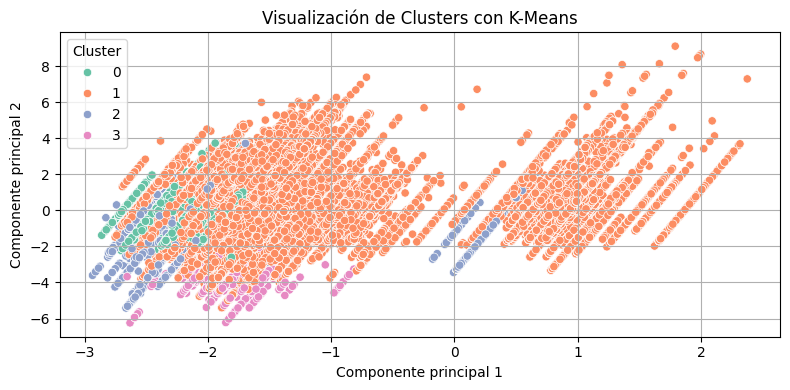

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_vehiculos_limpio.csv")

variables_riesgo = [
    'antiguedad', 'TRD0803', 'TRD0503', 'TRD0401', 'TRD0601',
    'TRD0804', 'TRD0502', 'TRD0901', 'TRD0403', 'TRD0202',
    'TRD0302', 'TRD0603', 'TRD0405', 'TRD0704', 'TRD1006'
]

tipo_vehiculo_cols = [col for col in df.columns if col.startswith("TRVTIPVE_")]
tipo_inspeccion_col = ['TRVPROSE_SEGUNDA Y SUCESIVAS']  # si está como True/False


df_segmentacion = df[variables_riesgo + tipo_vehiculo_cols + tipo_inspeccion_col].copy()

df_segmentacion = df_segmentacion.astype(int)


df_segmentacion.fillna(0, inplace=True)


scaler = StandardScaler()
datos_norm = scaler.fit_transform(df_segmentacion)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(datos_norm)

# PCA
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(datos_norm)
df['PCA1'] = pca_coords[:, 0]
df['PCA2'] = pca_coords[:, 1]

# Gráfico
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Visualización de Clusters con K-Means")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

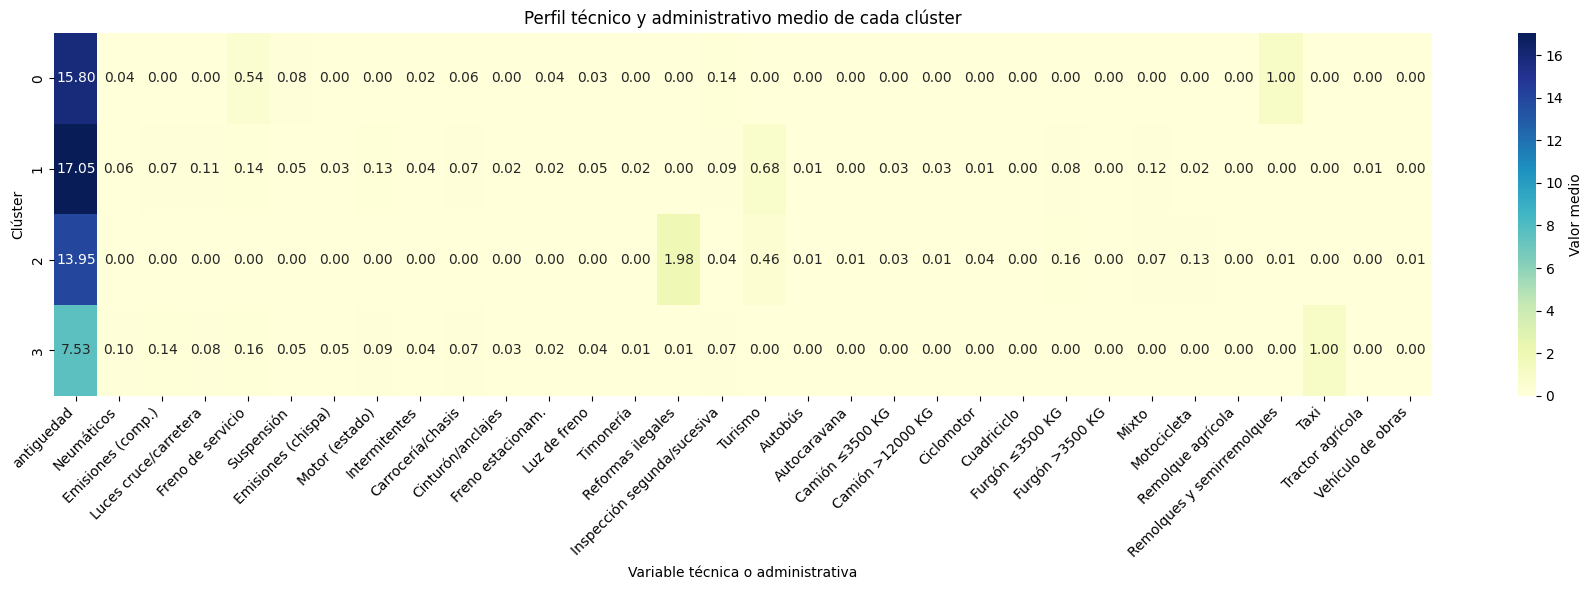

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_extra = [
    'TRVPROSE_SEGUNDA Y SUCESIVAS',
    'TRVTIPVE_TURISMO', 'TRVTIPVE_AUTOBUS', 'TRVTIPVE_AUTOCARAVANA',
    'TRVTIPVE_CAMION<=3500 KG', 'TRVTIPVE_CAMION>12000 KG', 'TRVTIPVE_CICLOMOTOR',
    'TRVTIPVE_CUADRICICLO', 'TRVTIPVE_FURGON<=3500 KG', 'TRVTIPVE_FURGON>3500 KG',
    'TRVTIPVE_MIXTO', 'TRVTIPVE_MOTOCICLETA', 'TRVTIPVE_REMOLQUE AGRICOLA',
    'TRVTIPVE_REMOLQUES Y SEMIRREMOLQUES', 'TRVTIPVE_TAXI', 'TRVTIPVE_TRACTOR AGRICOLA',
    'TRVTIPVE_VEHICULO OBRAS'
]

nombres_extra = {
    'TRVPROSE_SEGUNDA Y SUCESIVAS': 'Inspección segunda/sucesiva',
    'TRVTIPVE_TURISMO': 'Turismo', 'TRVTIPVE_AUTOBUS': 'Autobús',
    'TRVTIPVE_AUTOCARAVANA': 'Autocaravana', 'TRVTIPVE_CAMION<=3500 KG': 'Camión ≤3500 KG',
    'TRVTIPVE_CAMION>12000 KG': 'Camión >12000 KG', 'TRVTIPVE_CICLOMOTOR': 'Ciclomotor',
    'TRVTIPVE_CUADRICICLO': 'Cuadriciclo', 'TRVTIPVE_FURGON<=3500 KG': 'Furgón ≤3500 KG',
    'TRVTIPVE_FURGON>3500 KG': 'Furgón >3500 KG', 'TRVTIPVE_MIXTO': 'Mixto',
    'TRVTIPVE_MOTOCICLETA': 'Motocicleta', 'TRVTIPVE_REMOLQUE AGRICOLA': 'Remolque agrícola',
    'TRVTIPVE_REMOLQUES Y SEMIRREMOLQUES': 'Remolques y semirremolques',
    'TRVTIPVE_TAXI': 'Taxi', 'TRVTIPVE_TRACTOR AGRICOLA': 'Tractor agrícola',
    'TRVTIPVE_VEHICULO OBRAS': 'Vehículo de obras'
}


todas_las_variables = variables_riesgo + variables_extra


perfil_completo = df.groupby('Cluster')[todas_las_variables].mean()


nombres_finales = {**nombre_variables, **nombres_extra}
perfil_completo.rename(columns=nombres_finales, inplace=True)

# Gráfico
plt.figure(figsize=(18, 6))
sns.heatmap(perfil_completo, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Valor medio'})
plt.title("Perfil técnico y administrativo medio de cada clúster")
plt.ylabel("Clúster")
plt.xlabel("Variable técnica o administrativa")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

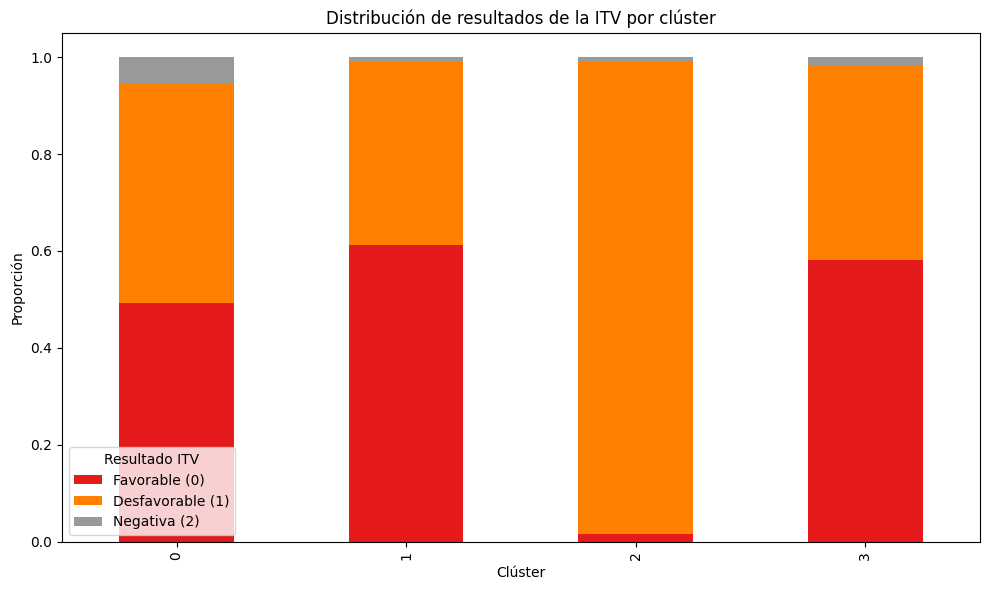

In [17]:
# Distribución de resultados ITV por clúster
itv_por_cluster = df.groupby('Cluster')['target'].value_counts(normalize=True).unstack().fillna(0)

itv_por_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title("Distribución de resultados de la ITV por clúster")
plt.xlabel("Clúster")
plt.ylabel("Proporción")
plt.legend(title="Resultado ITV", labels=['Favorable (0)', 'Desfavorable (1)', 'Negativa (2)'])
plt.tight_layout()
plt.show()

In [19]:
print(df['Cluster'].value_counts().sort_index())

Cluster
0      6640
1    298811
2      1488
3       859
Name: count, dtype: int64
